In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/melanoma_cancer_dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 531 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/melanoma_cancer_dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 346 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), input_shape=(64, 64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                   

In [ ]:
model.fit(x = training_set, epochs = 5)

Epoch 1/5
17/17 [==============================] - 191s 11s/step - loss: 0.6510 - accuracy: 0.6704
Epoch 2/5
17/17 [==============================] - 3s 147ms/step - loss: 0.4873 - accuracy: 0.7458
Epoch 3/5
17/17 [==============================] - 2s 135ms/step - loss: 0.3938 - accuracy: 0.8117
Epoch 4/5
17/17 [==============================] - 2s 141ms/step - loss: 0.3553 - accuracy: 0.8456
Epoch 5/5
17/17 [==============================] - 2s 136ms/step - loss: 0.3994 - accuracy: 0.8136


In [ ]:
training_set.class_indices

{'benign': 0, 'malignant': 1}

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/melanoma_cancer_dataset/test/benign/melanoma_9924.jpg', target_size = (64, 64))
test_image =tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
  prediction = 'malignant'
else:
  prediction = 'benign'

1/1 [==============================] - 0s 259ms/step


In [ ]:
prediction

'benign'

In [ ]:
import numpy as np
import pandas as pd
import random
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical


from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, log_loss, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [ ]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (28,28,3),activation = 'relu'))
model.add(Conv2D(128,(2,2),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 128)       1664      
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       65664     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dropout (Dropout)           (None, 21632)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2769024   
                                                      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
data_dir='/content/drive/MyDrive/melanoma_cancer_dataset'
train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 877 files belonging to 2 classes.
Using 790 files for training.
Found 877 files belonging to 2 classes.
Using 175 files for validation.


In [ ]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'test', 1: 'train'}

In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


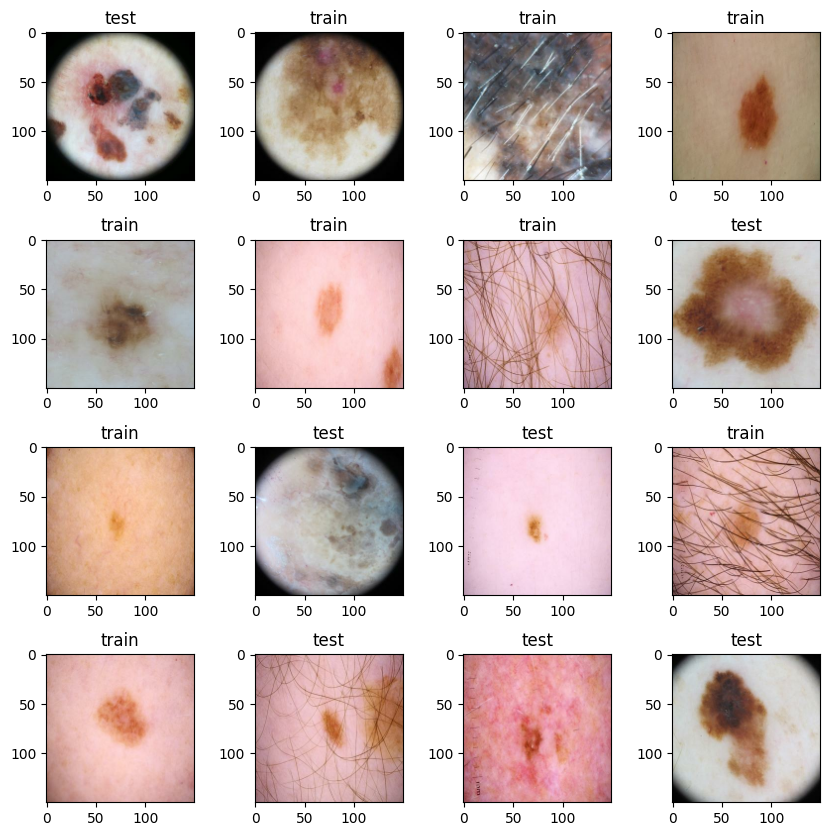

In [ ]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


In [ ]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
25/25 [==============================] - 22s 818ms/step - loss: 1.2723 - accuracy: 0.5684 - val_loss: 0.6886 - val_accuracy: 0.6114
Epoch 2/15
25/25 [==============================] - 0s 17ms/step - loss: 0.6842 - accuracy: 0.5747 - val_loss: 0.7167 - val_accuracy: 0.4229
Epoch 3/15
25/25 [==============================] - 0s 19ms/step - loss: 0.6790 - accuracy: 0.6063 - val_loss: 0.7306 - val_accuracy: 0.4286
Epoch 4/15
25/25 [==============================] - 0s 17ms/step - loss: 0.6847 - accuracy: 0.5494 - val_loss: 0.7171 - val_accuracy: 0.4171
Epoch 5/15
25/25 [==============================] - 0s 18ms/step - loss: 0.6692 - accuracy: 0.6076 - val_loss: 0.7402 - val_accuracy: 0.4171
Epoch 6/15
25/25 [==============================] - 0s 17ms/step - loss: 0.6762 - accuracy: 0.6114 - val_loss: 0.7151 - val_accuracy: 0.4914
Epoch 7/15
25/25 [==============================] - 0s 17ms/step - loss: 0.6620 - accuracy: 0.6114 - val_loss: 0.7277 - val_accuracy: 0.4400
Epoch 8/15


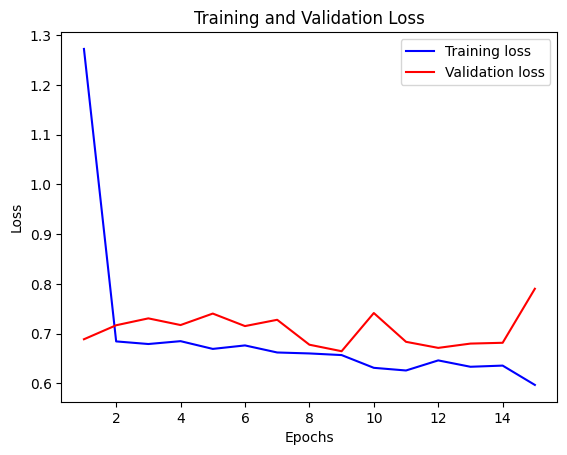

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

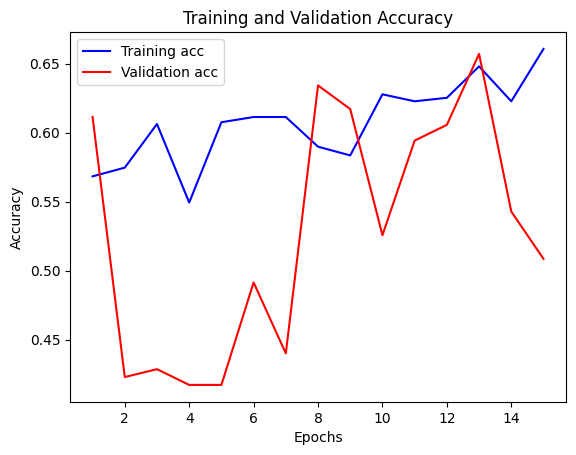

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

In [ ]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
VGG_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 2052      
                                                      

In [ ]:
epochs=15
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
25/25 [==============================] - 8s 286ms/step - loss: 1.8642 - accuracy: 0.3557 - val_loss: 1.2917 - val_accuracy: 0.6000
Epoch 2/15
25/25 [==============================] - 2s 81ms/step - loss: 1.2668 - accuracy: 0.5316 - val_loss: 1.0267 - val_accuracy: 0.6000
Epoch 3/15
25/25 [==============================] - 2s 81ms/step - loss: 0.9409 - accuracy: 0.6114 - val_loss: 0.8475 - val_accuracy: 0.6057
Epoch 4/15
25/25 [==============================] - 2s 83ms/step - loss: 0.7841 - accuracy: 0.6468 - val_loss: 0.7922 - val_accuracy: 0.6229
Epoch 5/15
25/25 [==============================] - 2s 81ms/step - loss: 0.6922 - accuracy: 0.6797 - val_loss: 0.6786 - val_accuracy: 0.6457
Epoch 6/15
25/25 [==============================] - 2s 92ms/step - loss: 0.6724 - accuracy: 0.6835 - val_loss: 0.6708 - val_accuracy: 0.6514
Epoch 7/15
25/25 [==============================] - 2s 81ms/step - loss: 0.5973 - accuracy: 0.7228 - val_loss: 0.6667 - val_accuracy: 0.6514
Epoch 8/15
2

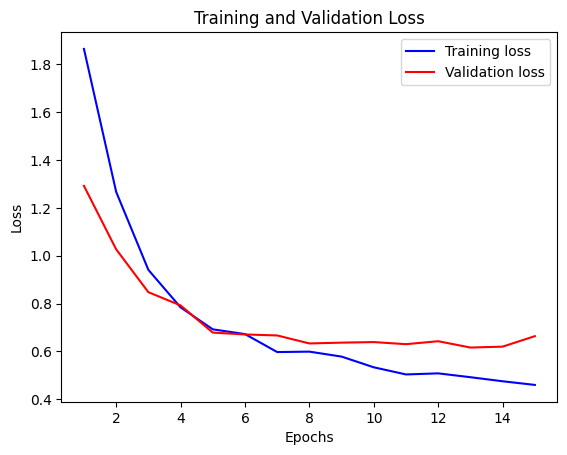

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

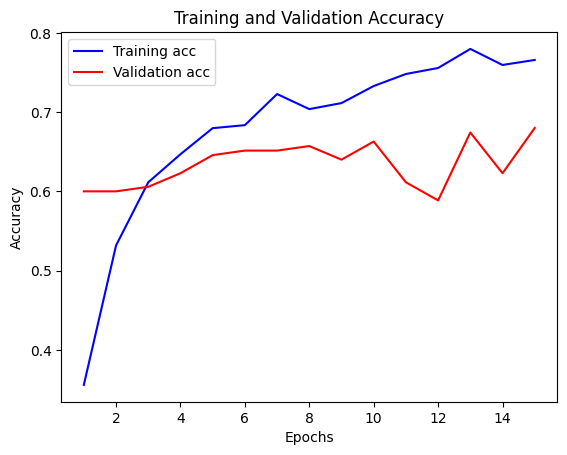

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
mobile_net = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


mobile_net.add(pretrained_model)
mobile_net.add(Flatten())
mobile_net.add(Dense(512, activation='relu'))
mobile_net.add(BatchNormalization())  # Batch Normalization layer
mobile_net.add(Dropout(0.5))

mobile_net.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mobile_net.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 flatten_6 (Flatten)         (None, 1280)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               655872    
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 4)                

In [ ]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
25/25 [==============================] - 8s 153ms/step - loss: 2.0297 - accuracy: 0.3418 - val_loss: 3.8170 - val_accuracy: 0.3486
Epoch 2/15
25/25 [==============================] - 1s 28ms/step - loss: 1.2629 - accuracy: 0.5076 - val_loss: 4.9520 - val_accuracy: 0.0914
Epoch 3/15
25/25 [==============================] - 1s 27ms/step - loss: 0.9292 - accuracy: 0.6405 - val_loss: 2.0475 - val_accuracy: 0.3371
Epoch 4/15
25/25 [==============================] - 1s 27ms/step - loss: 0.7482 - accuracy: 0.7051 - val_loss: 1.1482 - val_accuracy: 0.6057
Epoch 5/15
25/25 [==============================] - 1s 28ms/step - loss: 0.5744 - accuracy: 0.7646 - val_loss: 0.7722 - val_accuracy: 0.7143
Epoch 6/15
25/25 [==============================] - 1s 28ms/step - loss: 0.4795 - accuracy: 0.8013 - val_loss: 0.7477 - val_accuracy: 0.6686
Epoch 7/15
25/25 [==============================] - 1s 27ms/step - loss: 0.4406 - accuracy: 0.8025 - val_loss: 0.7124 - val_accuracy: 0.7314
Epoch 8/15
2

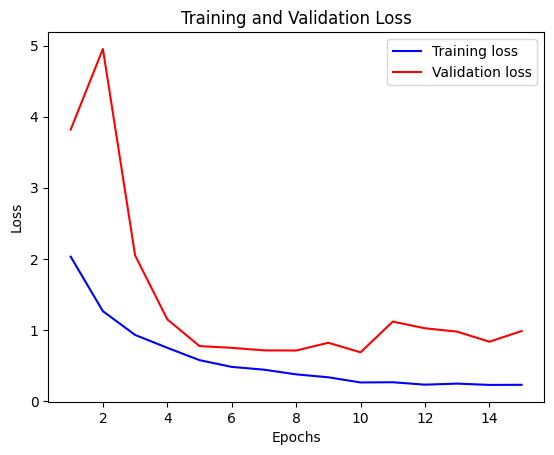

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

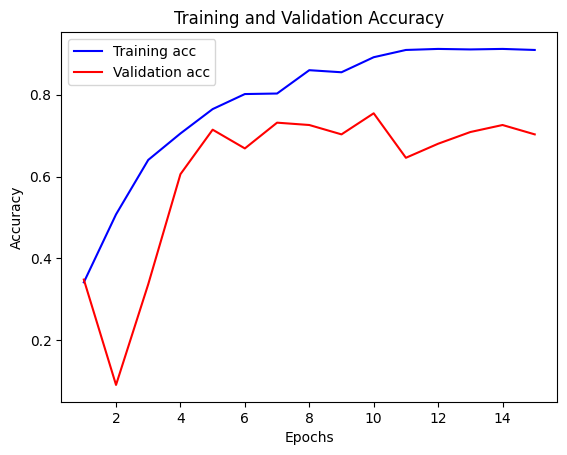

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

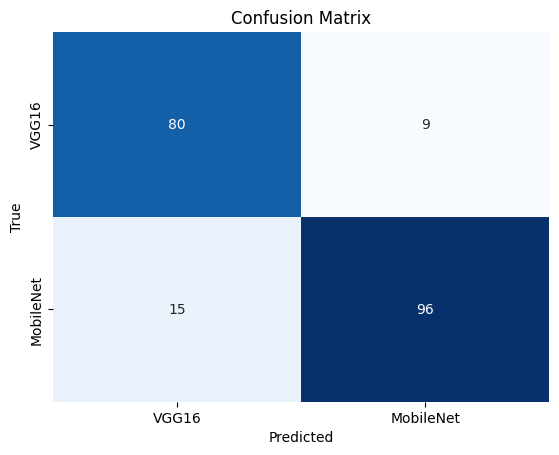

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X, y_true = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['VGG16', 'MobileNet'], yticklabels=['VGG16', 'MobileNet'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
